# Exploratory Data Analysis

First step is to import the necessary libraries then load my cleaned dataset

In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

### load the cleaned dataset

the datatypes established in the investiation jupyter notebook do not save when the cleaned csv is saved. I have provided them here in a dictionary so that they can be changed again when loaded here. 

In [3]:
dtypes_dict = {'age':'Int8', 
               'sex':'category', 
               'smoker':'category',
               'children': 'category',
               'region':'category', 
               'region (N/S)':'category', 
               'region (E/W)':'category', 
               'bmi category': 'category'}

df = pd.read_csv('../data/insurance_cleaned.csv', dtype=dtypes_dict)
df

,age,sex,bmi,children,smoker,region,charges,region (N/S),region (E/W),bmi category
0,19,female,27.900,0,yes,southwest,16884.92400,south,west,overweight
1,18,male,33.770,1,no,southeast,1725.55230,south,east,obese
2,28,male,33.000,3,no,southeast,4449.46200,south,east,obese
3,33,male,22.705,0,no,northwest,21984.47061,north,west,healthy weight
4,32,male,28.880,0,no,northwest,3866.85520,north,west,overweight
...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,north,west,obese
1334,18,female,31.920,0,no,northeast,2205.98080,north,east,obese
1335,18,female,36.850,0,no,southeast,1629.83350,south,east,obese
1336,21,female,25.800,0,no,southwest,2007.94500,south,west,overweight


I know that there are no null values in this dataset, but I can check that the data in each column make sense. For the categorical values I can check what the unique values are to see if there is anything that shouldn't be there. In the numerical columns I can use boxplots to check for outliers.

I checked the children column in the previous notebook.

In [47]:
df['sex'].unique()

['female', 'male']
Categories (2, object): ['female', 'male']

In [48]:
df['smoker'].unique()

['yes', 'no']
Categories (2, object): ['no', 'yes']

In [49]:
df['region'].unique()

['southwest', 'southeast', 'northwest', 'northeast']
Categories (4, object): ['northeast', 'northwest', 'southeast', 'southwest']

### Boxplots for numerical values

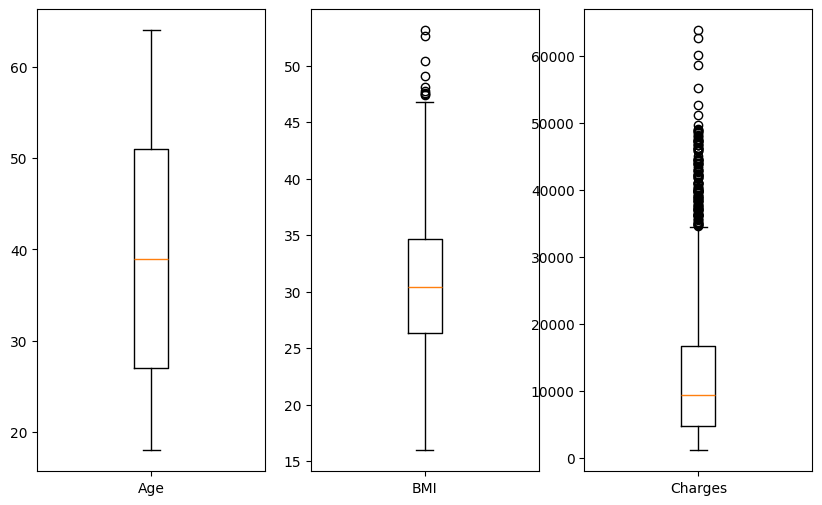

In [50]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 6))

ax[0].boxplot(df['age'], labels=['Age'])
ax[1].boxplot(df['bmi'], labels=['BMI'])
ax[2].boxplot(df['charges'], labels=['Charges'])
plt.show()

The large amout of outliers in both BMI and charges represent real world examples of people who are either overweight or being charged a large amount for their insurance, maybe because they smoke or because they have a long term cronic illness. For this reason the outliers are likely not to be mistakes but interesting values in the dataset. 

### Descriptive Statistics: Display average insurance charges by age, gender, and region.

I am going to group the results by age, gender and region to get the average results for each one, then plot the results in bar graphs

In [ ]:
#data grouped by age then mean calculated
df_group_age = df.groupby(by=['age'])['charges'].mean().round(2)
df_group_age.head()

age
18     7086.22
19     9747.91
20    10159.70
21     4730.46
22    10012.93
Name: charges, dtype: float64

In [ ]:
#data grouped by sex then the mean is calculated
df_group_sex = df.groupby(by=['sex'])['charges'].mean().round(2)
df_group_sex.head()

C:\Users\tb975\AppData\Local\Temp\ipykernel_4792\2218730196.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_group_sex = df.groupby(by=['sex'])['charges'].mean().round(2)


sex
female    12569.58
male      13956.75
Name: charges, dtype: float64

In [ ]:
#Grouped by region
df_group_region = df.groupby(by=['region'])['charges'].mean().round(2)
df_group_region


C:\Users\tb975\AppData\Local\Temp\ipykernel_4792\2435494198.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_group_region = df.groupby(by=['region'])['charges'].mean().round(2)


region
northeast    13406.38
northwest    12417.58
southeast    14735.41
southwest    12346.94
Name: charges, dtype: float64